In [56]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import time

In [57]:
iris = load_iris()
right_classes_idx = [idx for idx in range(iris.data.shape[0]) if iris.target[idx] in [0, 1]]

x = iris.data[right_classes_idx, :2]
y = iris.target[right_classes_idx]

print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [87]:
def plot_dataset():
    colors = ["blue", "red"]
    for p, cl in zip(x, y):
        plt.scatter(p[0], p[1], color=colors[cl])
    plt.show()

def plot_decision_border(model):
    colors = ["blue", "red"]
    for p, cl in zip(x, y):
        plt.scatter(p[0], p[1], color=colors[cl])
    x1_min, x1_max = x[:,0].min(), x[:,0].max(),
    x2_min, x2_max = x[:,1].min(), x[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')
    
def helper():
    x1_min, x1_max = x[:,0].min(), x[:,0].max(),
    x2_min, x2_max = x[:,1].min(), x[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    return grid, xx1
    
def plot_decision_border_inside(probs):
    colors = ["blue", "red"]
    for p, cl in zip(x, y):
        plt.scatter(p[0], p[1], color=colors[cl])
    x1_min, x1_max = x[:,0].min(), x[:,0].max(),
    x2_min, x2_max = x[:,1].min(), x[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')

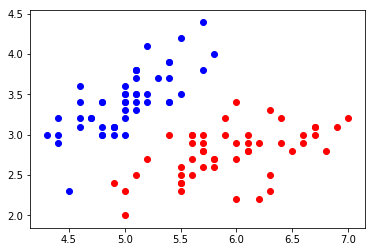

In [88]:
plot_dataset()

In [114]:
class LogisticRegression:
    def __init__(self, x, y, learning_rate=0.1, epochs=10000, use_bias=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.use_bias = use_bias
        self.x, self.y = x, y
    
    # If we want to use bias (intercept)
    def add_bias(self):
        intercept = np.ones((self.x.shape[0], 1))
        self.x = np.concatenate((intercept, self.x), axis=1)
    
    # Activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Loss function is binary cross entropy
    def loss(self, h, y):
        return np.mean((-y * np.log(h) - (1 - y) * np.log(1 - h)))
    
    # Fit/Train function
    def fit(self):
        # Weights initialization
        self.theta = np.random.normal(0, 0.01, (self.x.shape[1],1)
        print("Start weights: ", self.theta)
        
        for i in range(self.epochs):
            # Compute classification: class = g(theta*x), 
            # where g is the activation function
            z = np.dot(self.x, self.theta)
            h = self.sigmoid(z)
            # Compute gradient and update the weights
            # with gradient descent
            gradient = np.dot(self.x.T, (h - y)) / self.y.size
            self.theta = self.theta - self.learning_rate * gradient
            
            if i % 100000 == 0:
                z = np.dot(self.x, self.theta)
                h = self.sigmoid(z)
                print('Loss: ', self.loss(h, self.y))
                grid, xx1 = helper()
                probs = self.predict_prob(grid).reshape(xx1.shape)
                plot_decision_border_inside(probs)
    
    def predict_prob(self, x):
        return self.sigmoid(np.dot(self.x, self.theta))
    
    def predict(self, x):
        return self.predict_prob(x).round()

SyntaxError: invalid syntax (<ipython-input-114-94baf3ca7e74>, line 27)

Start weights:  [-0.0031643  -0.01779687  0.01818028]
Loss:  0.695795138923581
Loss:  0.02637594252576305
Loss:  0.017145468041598545
Loss:  0.012828207001642328
Loss:  0.010351186335272676
Computation time:  4.199302434921265


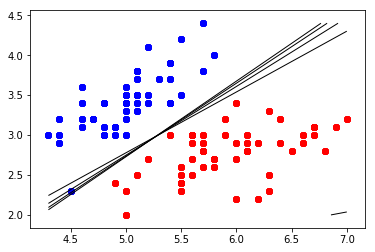

In [115]:
model = LogisticRegression(learning_rate=0.05, epochs=500000, use_bias=True)

start = time.time()
model.fit(x, y)
end = time.time()
print("Computation time: ", end - start)

preds = model.predict(x)

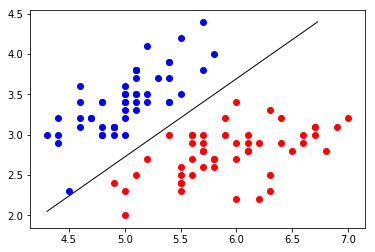

In [72]:
plot_decision_border(model)